In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [2]:
## Use this to read data directly from github
df = pd.read_csv('https://gist.githubusercontent.com/Harsh-Git-Hub/2979ec48043928ad9033d8469928e751/raw/72de943e040b8bd0d087624b154d41b2ba9d9b60/retail_dataset.csv', sep=',')
## Print first 10 rows 
df.head(10)

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN
5,Eggs,Bread,Wine,Pencil,Milk,Diaper,Bagel
6,Wine,Pencil,Eggs,Cheese,NaN,NaN,NaN
7,Bagel,Bread,Milk,Pencil,Diaper,NaN,NaN
8,Bread,Diaper,Cheese,Milk,Wine,Eggs,NaN
9,Bagel,Wine,Diaper,Meat,Pencil,Eggs,Cheese


In [3]:
items = set()
for col in df:
    items.update(df[col].unique())
print(items)

{nan, 'Eggs', 'Meat', 'Cheese', 'Bread', 'Wine', 'Diaper', 'Bagel', 'Milk', 'Pencil'}


In [4]:
# Data Preprocessing
itemset = set(items)
encoded_vals = []
for index, row in df.iterrows():
    rowset = set(row) 
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_df = pd.DataFrame(encoded_vals)

In [5]:
freq_items = apriori(ohe_df, min_support=0.2, use_colnames=True)
freq_items.head(7)

,support,itemsets
0,0.869841,(nan)
1,0.425397,(Bagel)
2,0.501587,(Milk)
3,0.476190,(Meat)
4,0.438095,(Eggs)
5,0.501587,(Cheese)
6,0.504762,(Bread)


In [6]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bagel),(nan),0.425397,0.869841,0.336508,0.791045,0.909413,-0.033520,0.622902
1,(Milk),(nan),0.501587,0.869841,0.409524,0.816456,0.938626,-0.026778,0.709141
2,(Meat),(nan),0.476190,0.869841,0.368254,0.773333,0.889051,-0.045956,0.574230
3,(Eggs),(nan),0.438095,0.869841,0.336508,0.768116,0.883053,-0.044565,0.561310
4,(Cheese),(nan),0.501587,0.869841,0.393651,0.784810,0.902245,-0.042651,0.604855


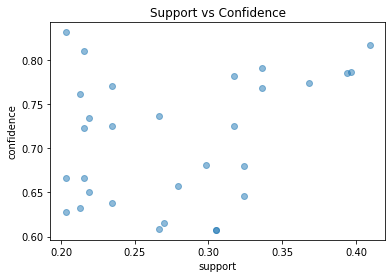

In [7]:
# Rules vs Confidence
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

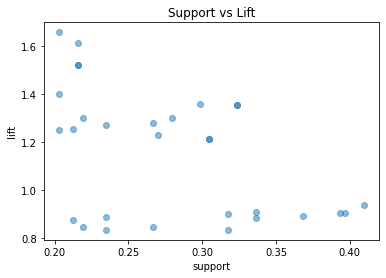

In [8]:
# Support vs Lift
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

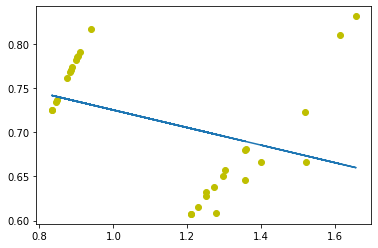

In [9]:
# Lift vs Confidence
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], fit_fn(rules['lift']))